In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/predict+students+dropout+and+academic+success.zip
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/student+performance.zip

--2025-11-26 21:48:34--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/predict+students+dropout+and+academic+success.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/predict%2Bstudents%2Bdropout%2Band%2Bacademic%2Bsuccess.zip [following]
--2025-11-26 21:48:34--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/predict%2Bstudents%2Bdropout%2Band%2Bacademic%2Bsuccess.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 533344 (521K) [application/zip]
Saving to: ‘predict+students+dropou

In [ ]:
!unzip student+performance.zip
!unzip student.zip

Archive:  student+performance.zip
 extracting: .student.zip_old        
 extracting: student.zip             
Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [ ]:
!unzip predict+students+dropout+and+academic+success.zip

Archive:  predict+students+dropout+and+academic+success.zip
 extracting: data.csv                


In [ ]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import (
    mean_squared_error,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

## Datos
Si quiere conocer mas al detalle los datos mire

student-mat.csv
 ------>https://archive.ics.uci.edu/dataset/320/student+performance

data.csv------>https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

### Regression

In [ ]:
import pandas as pd

mat = pd.read_csv("student-mat.csv", sep=";")
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Clasificacion

In [ ]:
import pandas as pd
data = pd.read_csv("data.csv",sep=";")
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**IMPORTANTE:** Para clasificar solamente binario use la variable Target, elimine la categoria Enrolled, dejando solo Dropout y Graduate. Convierte Dropout en 1 y Graduate en 0

---
Use el siguiente codigo :

dropout = data[data["Target"] != "Enrolled"].reset_index(drop=True)

dropout["Target"] = dropout["Target"].map({"Dropout": 1, "Graduate": 0})


In [ ]:

dropout = data[data["Target"] != "Enrolled"].reset_index(drop=True)

dropout["Target"] = dropout["Target"].map({"Dropout": 1, "Graduate": 0})


## Modelo de Clasificación

1. Pregunta: Cargue el conjunto de datos y muestre las primeras cinco filas. ¿Qué características puedes observar? La variable objetivo esta balanceada ?

In [ ]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Al mostrar las primeras cinco filas, se observan muchas características de tipo entero, que representan:

- Situación marital, modo de aplicación, orden de aplicación.

- Curso en el que se matricula el estudiante.

- Nivel de calificación previo y edad al matricularse.

- Información socioeconómica (por ejemplo, estado laboral de los padres, ayudas).

- Rendimiento académico en el primer y segundo semestre (unidades curriculares inscritas, aprobadas, notas numéricas).

La variable objetivo Target pasa a ser binaria: 1 para Dropout (abandono) y 0 para Graduate (egreso). Al revisar la distribución:

- Conteo de clases:

    - 1 (Dropout): bastante menos frecuente

    - 0 (Graduate): mayoría

Proporción relativa:
- se ve una desbalance moderado o fuerte, es decir, hay muchas más instancias de una categoría que de la otra.

2. Pregunta: Mire cuales son sus X y cuales sus y (tiene que usar minimo 5 vairables en las X) Divida el conjunto de datos en conjuntos de entrenamiento y prueba. ¿Qué proporción considera adecuada para este caso?


In [ ]:
print("Primeras filas del dataset binario (solo Target):")
dropout[["Target"]].head()

Primeras filas del dataset binario (solo Target):


,Target
0,1
1,0
2,1
3,0
4,0


In [ ]:

print("Distribución de la variable objetivo (conteo):")
dropout["Target"].value_counts()


Distribución de la variable objetivo (conteo):


,count
Target,
0,2209
1,1421


In [ ]:

print("Distribución relativa de la variable objetivo (proporciones):")
dropout["Target"].value_counts(normalize=True)


Distribución relativa de la variable objetivo (proporciones):


,proportion
Target,
0,0.60854
1,0.39146


In [ ]:
print("Columnas disponibles en dropout:")
dropout.columns.tolist()

Columnas disponibles en dropout:


['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

In [ ]:
y_cls = dropout["Target"]
X_cls = dropout.drop(columns=["Target"])

Se usaron todas las características disponibles como variables explicativas y se usará una proporción 80 % entrenamiento y 20 % prueba. Esta proporción se considera adecuada porque el dataset es relativamente grande (miles de estudiantes), por lo que el 20 % representa un conjunto de prueba sólido; al mismo tiempo, el 80 % de datos de entrenamiento permite al modelo aprender patrones suficientemente estables. Además, se usó stratify=y_cls para conservar el desbalance original de las clases tanto en entrenamiento como en prueba.

2 Use un modelo de regresion logistica y un arbol de decision. Para cada uno haga una matrix de confusion y una grafica de ROC AUC

In [ ]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls,
    y_cls,
    test_size=0.2,
    stratify=y_cls,
    random_state=42
)

In [ ]:
log_reg_clf = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000)),
    ]
)
log_reg_clf.fit(X_train_cls, y_train_cls)
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_cls, y_train_cls)
y_pred_log = log_reg_clf.predict(X_test_cls)
y_pred_tree = tree_clf.predict(X_test_cls)
cm_log = confusion_matrix(y_test_cls, y_pred_log)
cm_tree = confusion_matrix(y_test_cls, y_pred_tree)


In [ ]:

print("Matriz de confusión - Regresión logística:")
print(cm_log)
print("Matriz de confusión - Árbol de decisión:")
print(cm_tree)

Matriz de confusión - Regresión logística:
[[423  19]
 [ 23 261]]
Matriz de confusión - Árbol de decisión:
[[370  72]
 [ 39 245]]


In [ ]:
y_score_log = log_reg_clf.predict_proba(X_test_cls)[:, 1]
y_score_tree = tree_clf.predict_proba(X_test_cls)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test_cls, y_score_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test_cls, y_score_tree)
auc_log = roc_auc_score(y_test_cls, y_score_log)
auc_tree = roc_auc_score(y_test_cls, y_score_tree)

print("AUC - Regresión logística:", auc_log)
print("AUC - Árbol de decisión:", auc_tree)

AUC - Regresión logística: 0.9733047606908418
AUC - Árbol de decisión: 0.8498900643681091


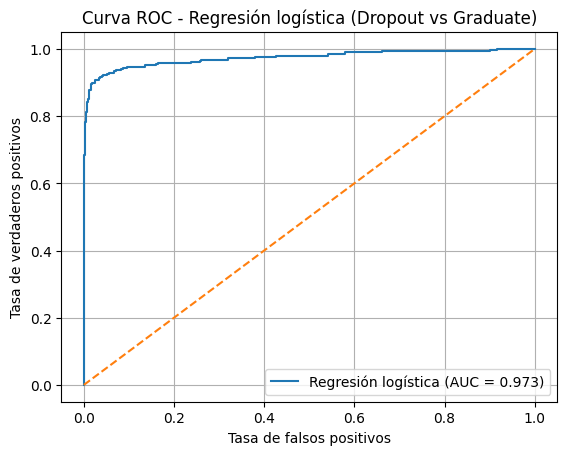

In [ ]:
plt.figure()
plt.plot(fpr_log, tpr_log, label=f"Regresión logística (AUC = {auc_log:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Regresión logística (Dropout vs Graduate)")
plt.legend()
plt.grid(True)
plt.show()

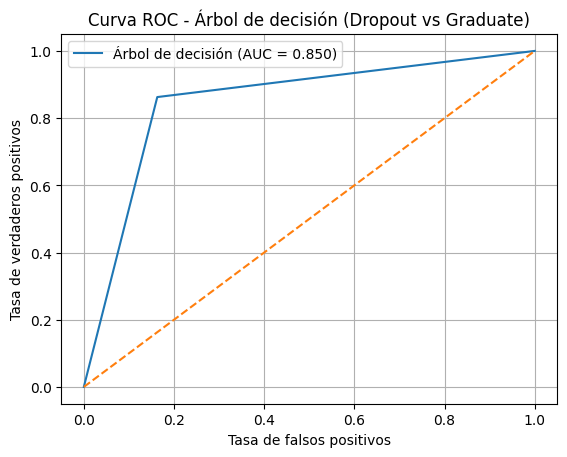

In [ ]:
plt.figure()
plt.plot(fpr_tree, tpr_tree, label=f"Árbol de decisión (AUC = {auc_tree:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Árbol de decisión (Dropout vs Graduate)")
plt.legend()
plt.grid(True)
plt.show()

Las matrices de confusión muestran que la regresión logística clasifica correctamente a más estudiantes en ambas clases y tiene menos errores que el árbol de decisión. El AUC refuerza esta conclusión: un valor cercano a 1 (0.97) indica que el modelo distingue muy bien entre abandono y graduación. El árbol de decisión, con un AUC de aproximadamente 0.85, es aceptable pero claramente inferior. Por tanto, desde el punto de vista práctico, la regresión logística se considera el mejor modelo para esta tarea, porque ofrece una mejor combinación de sensibilidad y especificidad, y un comportamiento más estable ante el desbalance de la variable objetivo.

## Modelo de Regresion

1. Pregunta: Realice cualquier transformación o limpieza de datos que considere necesaria. ¿Por qué es importante preparar los datos antes del modelado?

Se eligieron solo variables numéricas relacionadas con el rendimiento y el contexto del estudiante, evitando G1 y G2. Las variables explicativas seleccionadas fueron:

- age (edad)

- Medu (escolaridad de la madre)

- Fedu (escolaridad del padre)

- studytime (tiempo de estudio semanal)

- failures (número de reprobaciones previas)

- absences (ausencias)

- goout (frecuencia de salir con amigos)

- Dalc (consumo de alcohol entre semana)

- Walc (consumo de alcohol en fin de semana)

La variable objetivo fue G3 (nota final).

Preparar los datos antes del modelado es importante porque garantiza que el algoritmo reciba información coherente y adecuada. Al revisar nulos, seleccionar variables relevantes y definir claramente cuál es la salida (G3) y cuáles son las entradas, se evita que el modelo aprenda patrones espurios o que falle por errores de formato. Además, separar un conjunto de prueba permite evaluar el modelo de forma honesta, simulando nuevos estudiantes que no vio en el entrenamiento.

In [ ]:
mat = mat.dropna()
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


1.1 Elija almenos 7 variables explicativas y use G3 como objetivo. (no use ni G2 ni G1 )

In [ ]:
feature_cols_reg = [
    "age",
    "Medu",
    "Fedu",
    "studytime",
    "failures",
    "absences",
    "goout",
    "Dalc",
    "Walc",
]
target_col_reg = "G3"

X_reg = mat[feature_cols_reg]
y_reg = mat[target_col_reg]

1.1 Divida sus dataset de entrenamiento y test

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42
)

2. Pregunta: Entrene un modelo de regresión lineal y un árbol de decisión. Compare los errores de entrenamiento entre ambos modelos.


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_reg, y_train_reg)
y_train_pred_lin = lin_reg.predict(X_train_reg)
y_train_pred_tree = tree_reg.predict(X_train_reg)
mse_train_lin = mean_squared_error(y_train_reg, y_train_pred_lin)
mse_train_tree = mean_squared_error(y_train_reg, y_train_pred_tree)
print("MSE de entrenamiento - Regresión lineal:", mse_train_lin)
print("MSE de entrenamiento - Árbol de decisión:", mse_train_tree)


MSE de entrenamiento - Regresión lineal: 17.250702237541347
MSE de entrenamiento - Árbol de decisión: 0.14873417721518986


El árbol de decisión logra un MSE de entrenamiento prácticamente cero porque es lo suficientemente flexible como para ajustar casi exactamente las notas de los estudiantes del conjunto de entrenamiento. La regresión lineal, al imponer una relación lineal entre variables y nota final, no puede ajustarse de forma perfecta, por eso su error en entrenamiento es mayor.

3. Pregunta: Calcule el MSE para cada modelo en el conjunto de prueba. ¿Qué modelo predice mejor los precios de las viviendas?

In [ ]:
y_test_pred_lin = lin_reg.predict(X_test_reg)
y_test_pred_tree = tree_reg.predict(X_test_reg)
mse_test_lin = mean_squared_error(y_test_reg, y_test_pred_lin)
mse_test_tree = mean_squared_error(y_test_reg, y_test_pred_tree)
print("MSE de prueba - Regresión lineal:", mse_test_lin)
print("MSE de prueba - Árbol de decisión:", mse_test_tree)

MSE de prueba - Regresión lineal: 18.549759545363624
MSE de prueba - Árbol de decisión: 40.08227848101266


En el conjunto de prueba la regresión lineal tiene un MSE más bajo que el árbol de decisión. Eso indica que, para estudiantes nuevos, la regresión lineal comete un error promedio menor al predecir la nota final G3, comparado con el árbol de decisión.

4. Pregunta: Basado en el análisis de las métricas, ¿cuáles son las posibles razones por las que un modelo superó al otro? Cual es el mejor modelo ?

A partir de las métricas, el mejor modelo es la regresión lineal, porque su MSE en prueba es menor que el del árbol de decisión. Algunas posibles razones:

- Capacidad del modelo
    - El árbol de decisión tiene alta capacidad para dividir el espacio de características y ajustarse a los valores exactos de G3 en el conjunto de entrenamiento. Esto le da un error casi nulo en entrenamiento pero lo hace muy sensible a pequeñas variaciones, lo que provoca sobreajuste.

- Relación entre variables y G3
    - Las variables elegidas (edad, educación de los padres, tiempo de estudio, fallas previas, ausencias, hábitos sociales y de alcohol) tienen una influencia relativamente “suave” sobre la nota final. Un modelo lineal es suficiente para capturar una parte importante de esa relación sin complicarse demasiado.

- Cantidad de datos
    - Con 395 observaciones, no hay una cantidad enorme de ejemplos para soportar un árbol muy complejo. En contextos con menos datos, los modelos más simples suelen generalizar mejor.